# Importing the libraries

In [1]:
import numpy as np 

import pandas as pd 


import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# This is the data of titanic ship in .csv format

In [2]:
titanic = pd.read_csv("train.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Here we see how many person survived and how many did not survived. '0' means survived and '1' means not survived

<Axes: xlabel='Survived', ylabel='count'>

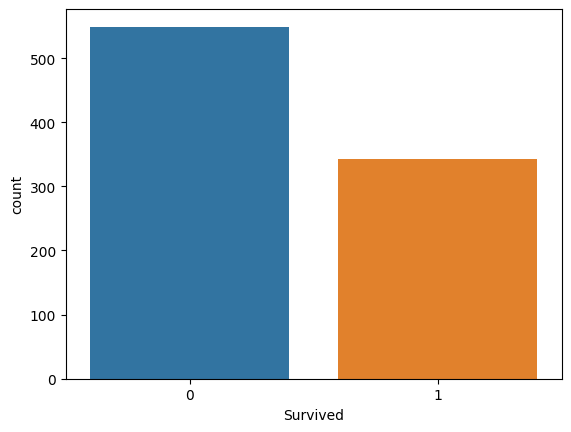

In [6]:
sns.countplot(x = 'Survived', data = titanic)

# Here we plot various survival graphs on various factors.

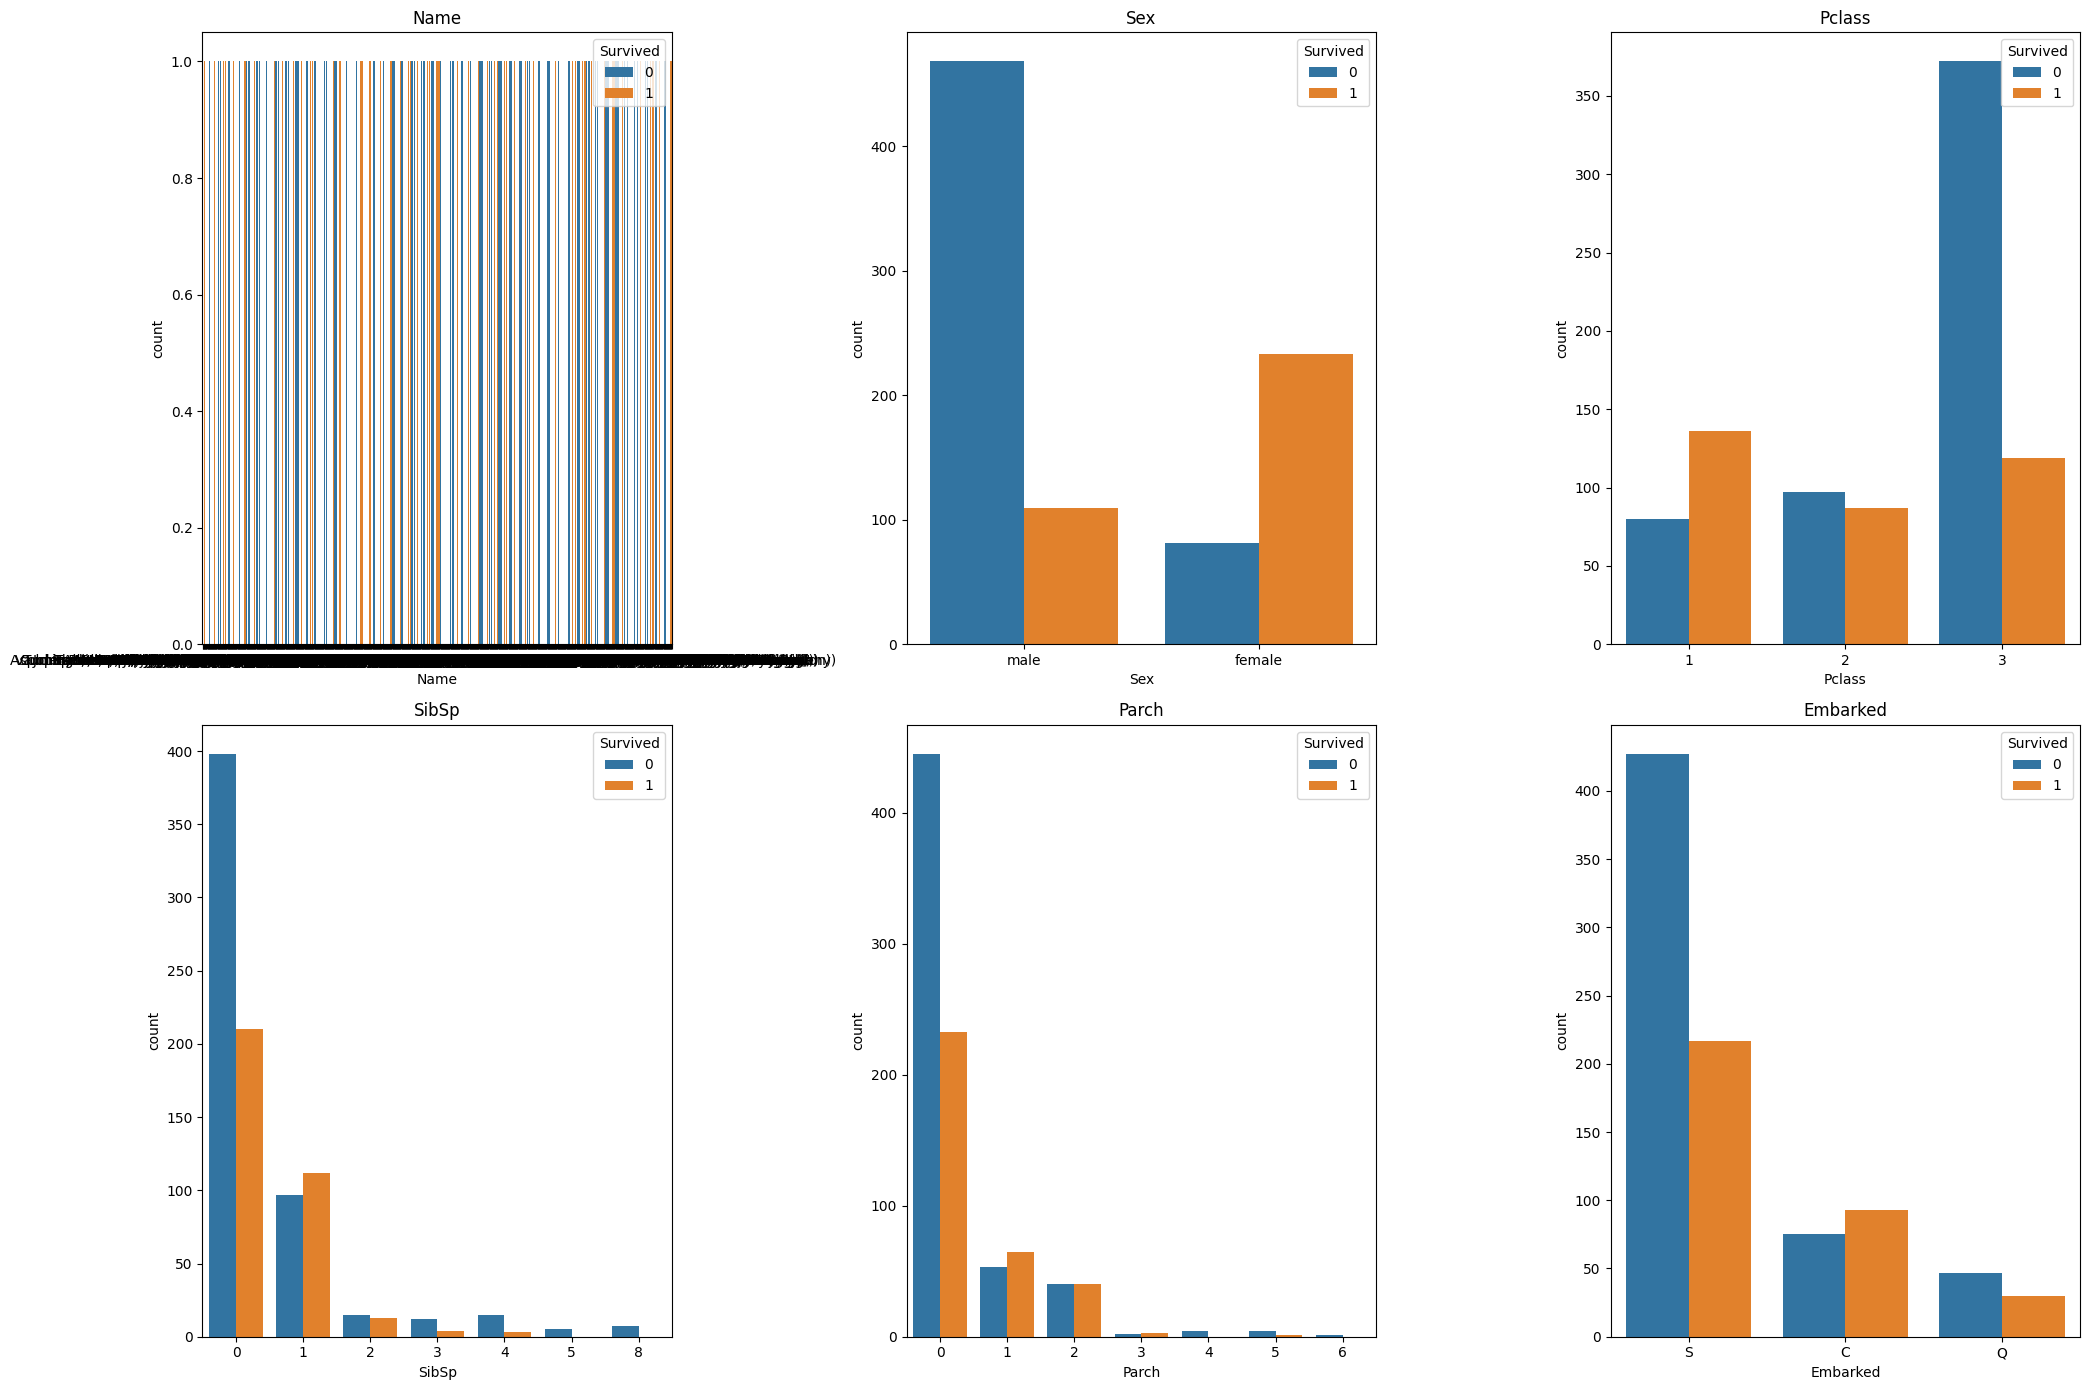

In [7]:
cols = ['Name', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*7, n_rows*7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        
        i = r*n_cols+c
        ax = axs[r][c]
        sns.countplot(x=cols[i], hue="Survived", data=titanic, ax=ax)
        ax.set_title(cols[i])
        ax.legend(title = "Survived", loc = 'upper right')
        
plt.tight_layout()

In [8]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Here we check the survival rate of person on the basis of sex and passenger class

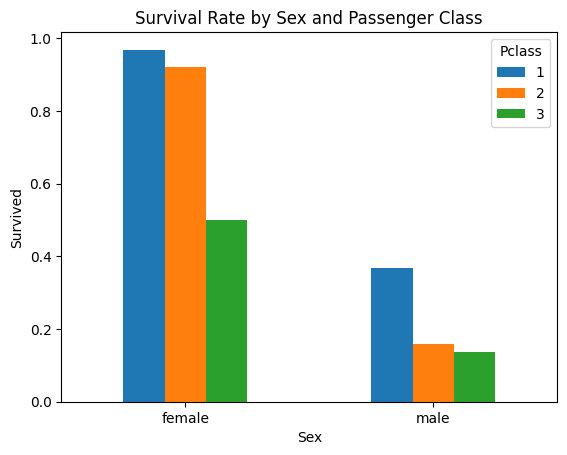

In [10]:
titanic['Sex'] = titanic['Sex'].astype('category')

pivot_table = titanic.pivot_table('Survived', index='Sex', columns='Pclass')
pivot_table.plot(kind='bar')

plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Survival Rate by Sex and Passenger Class')
plt.legend(title='Pclass')
plt.xticks(rotation=0)

plt.show()


In [11]:
age = pd.cut(titanic['Age'], [0, 18, 20])
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1     2         3
Sex    Age                               
female (0, 18]   0.909091  1.00  0.511628
       (18, 20]  1.000000  1.00  0.500000
male   (0, 18]   0.800000  0.60  0.215686
       (18, 20]  0.000000  0.25  0.160000

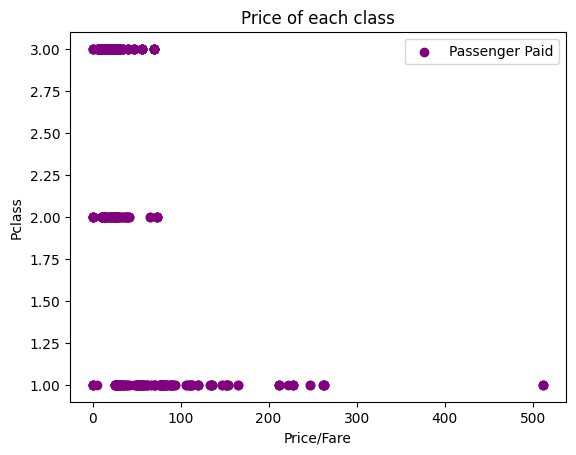

In [12]:
plt.scatter(titanic['Fare'], titanic['Pclass'], color = 'purple', label = 'Passenger Paid')
plt.ylabel('Pclass')
plt.xlabel('Price/Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [13]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1


# we drop that column that is not necessary.

In [15]:
titanic = titanic.drop(['Cabin', 'Name', 'Ticket'], axis =1)
titanic = titanic.dropna(subset=['Age'])

In [16]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked         object
dtype: object

In [17]:
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male', 'female']
Categories (2, object): ['female', 'male']
['S' 'C' 'Q' nan]


# By labelencoder we convert object data type column in integer data type

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#print(titanic.shape[1]) 

titanic.iloc[:,3] = labelencoder.fit_transform(titanic.iloc[:,3].values)

titanic.iloc[:,8] = labelencoder.fit_transform(titanic.iloc[:,8].values)

print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())


[1 0]
[2 0 1 3]


# Split the data into independent ‘X’ and dependent ‘Y’ data sets.

In [19]:
x = titanic.iloc[:, 1:8].values
y = titanic.iloc[:, 0].values

# Split the data again, this time into 80% training (X_train and Y_train) and 20% testing (X_test and Y_test) data sets.

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Create a function that has within it many different machine learning models that we can use to make our predictions.

In [22]:
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
    knn.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(x_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(x_train, y_train)

    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(x_train, y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log,  svc_lin, svc_rbf, gauss, tree, forest





In [23]:
model = models(x_train , y_train)

[0]Logistic Regression Training Accuracy: 0.287215411558669
[1]K Nearest Neighbor Training Accuracy: 0.2171628721541156
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9439579684763573
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9492119089316988
[4]Gaussian Naive Bayes Training Accuracy: 0.9492119089316988
[5]Decision Tree Classifier Training Accuracy: 0.9492119089316988
[6]Random Forest Classifier Training Accuracy: 0.9281961471103327


# I use the random forest classifire for predict the data

In [26]:
forest = model[5]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Fare,0.332
Age,0.323
Pclass,0.086
Sex,0.074
SibSp,0.074
Survived,0.067
Parch,0.044


<Axes: xlabel='feature'>

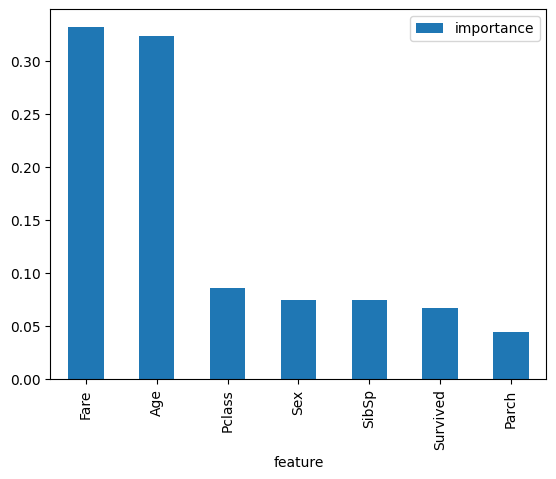

In [27]:
importances.plot.bar()

In [28]:
pred = model[5].predict(x_test)
print(pred)


print()


print(x_test)

[ 42 332 803 345 631 315 315 156 695 463 522   3 480 706 530 162 723 375
   9 809 228 866 547 245 314 375 270 386 371 133 637 165 726 497   5 350
 487 573  92 112  81 284  93 119 282  40 183 566 364 254 807 200 344  62
 527 705 428 268  34 138 125 130 581 877 258 883 338  71  28 357 321 764
 248 836 338  24  23 373 314 734 221 713 463 212 797 677 549 358 690 151
 782 515 290 279  62 183 487 115 871 207 618  24 866 463 308 323 258 246
 300 687 409  74 643 361 660 104 674 189 212  57 776 427  74 201 746 433
 234 562 130 388 276 430 119 573  24 409 394 375 118 676 191 350 581]

[[-0.80936547  0.88918354 -1.34127537 ...  0.52738756  0.65894866
  -0.35718388]
 [-0.80936547 -1.52280601 -1.34127537 ... -0.54047874 -0.49877345
  -0.09372955]
 [ 1.23553578 -1.52280601  0.74555906 ...  0.52738756  1.81667077
   2.16737593]
 ...
 [ 1.23553578 -0.31681124 -1.34127537 ... -0.54047874 -0.49877345
  -0.38295409]
 [-0.80936547  0.88918354  0.74555906 ... -0.54047874 -0.49877345
  -0.46279571]
 [ 1.235

In [30]:
my_survival = [[3,1,21,0, 0, 0, 1]]
#Print Prediction of Random Forest Classifier model
pred = model[5].predict(my_survival)
print(pred)

if pred == 0:
    print("Oh no! You didn't make it")
else:
    print('Nice! You survived')

[254]
Nice! You survived


In [32]:
titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0
10,11,1,3,0,4.0,1,1,16.7000,2


In [33]:
display(titanic)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,1
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [35]:
first_column = titanic.pop('Survived')

In [36]:
titanic.insert(0, 'Survived', first_column)

# In this dataframe we can see who survived or not on the various factors '0' means person is dead and '1' means person survived.

In [37]:
display(titanic)

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,1,22.0,1,0,7.2500,2
1,1,2,1,0,38.0,1,0,71.2833,0
2,1,3,3,0,26.0,0,0,7.9250,2
3,1,4,1,0,35.0,1,0,53.1000,2
4,0,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,0,886,3,0,39.0,0,5,29.1250,1
886,0,887,2,1,27.0,0,0,13.0000,2
887,1,888,1,0,19.0,0,0,30.0000,2
889,1,890,1,1,26.0,0,0,30.0000,0
